# 03 - Stats Review: The Most Dangerous Equation

Howard Wainer는 2007년 유명한 [논문](http://assets.press.princeton.edu/chapters/s8863.pdf)을 통해 매우 위험한 방정식에 대해 기술했습니다.

"어떤 방정식은 알면 위험하고, 어떤 방정식은 모르면 위험하다. 알면 위험한 방정식은 끔찍한 결과를 만들기 때문에 위험하다. 대표적인 방정식은 아인슈타인의 질량-에너지 등가 방정식 $E = MC^2$으로, 평범한 물질 안에 숨겨진 거대한 에너지 척도를 제공한다. \[...\] 대신 나는 모를 때 때 위험한 방정식에 관심 있다. 이는 사물을 명확하게 이해할 수 있게 해주며, 이들의 부재는 우리를 위험할 정도로 무지하게 만든다."

그가 말하는 방정식은 De Moivre’s(드 무아브르) 방정식입니다.

$
SE = \dfrac{\sigma}{\sqrt{n}} 
$

$SE$는 평균의 표준 오차, $\sigma$는 표준 편차, $n$은 샘플 크기입니다. 용감하고 진실한 사람이 숙달해야 할 수학처럼 들립니다.

De Moivre’s 방정식을 모르는 것이 왜 매우 위험한지 알아보기 위해, 데이터를 살펴보겠습니다. 저는 3년 동안 다른 학교의 ENEM 점수(SAT와 유사한 브라질 표준화 고등학교 점수)에 대한 데이터를 수집했습니다. 유효한 정보만 남겨두기 위해 데이터를 처리했습니다. 원본 데이터는 [Inep website](http://portal.inep.gov.br/web/guest/microdados#)에서 다운로드 받을 수 있습니다.

가장 성적이 좋은 학교를 살펴볼 때 눈길을 끄는 것이 있습니다. 바로 학교의 학생 수가 적다는 것입니다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("./data/enem_scores.csv")
df.sort_values(by="avg_score", ascending=False).head(10)

,year,school_id,number_of_students,avg_score
16670,2007,33062633,68,82.97
16796,2007,33065403,172,82.04
16668,2005,33062633,59,81.89
16794,2005,33065403,177,81.66
10043,2007,29342880,43,80.32
18121,2007,33152314,14,79.82
16781,2007,33065250,80,79.67
3026,2007,22025740,144,79.52
14636,2007,31311723,222,79.41
17318,2007,33087679,210,79.38


상위권은 어떤 사람일까요? 가장 좋은 사례에서 배운 것을 다른 곳에 적용할 수 있을 것입니다. 상위 1%의 학교를 보면, 평균적으로 학생 수가 적다는 것을 알 수 있습니다.

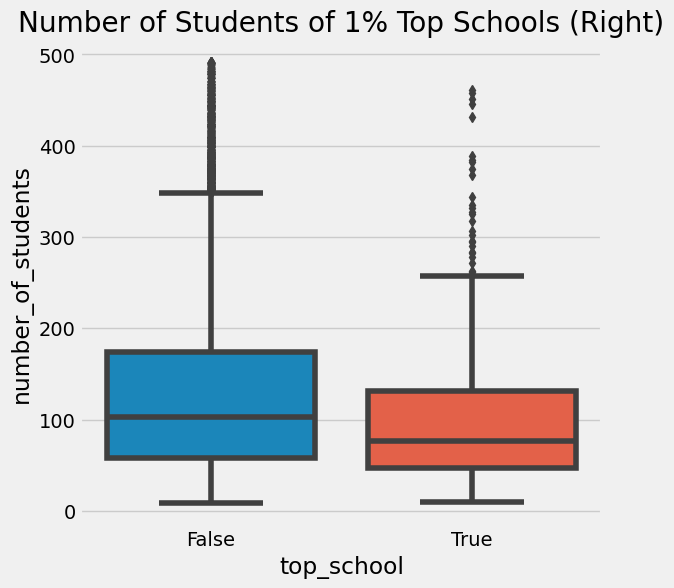

In [3]:
plot_data = (df
             .assign(top_school = df["avg_score"] >= np.quantile(df["avg_score"], .99))
             [["top_school", "number_of_students"]]
             .query(f"number_of_students<{np.quantile(df['number_of_students'], .98)}")) # remove outliers

plt.figure(figsize=(6,6))
sns.boxplot(x="top_school", y="number_of_students", data=plot_data)
plt.title("Number of Students of 1% Top Schools (Right)");

한 가지 자연스러운 결론은 작은 학교가 더 높은 학업 성취도로 이어진다는 것입니다. 선생님 한 명당 학생 수가 적으면 학생 한 명 한 명에게 집중적인 관심을 줄 수 있어 이치에 맞습니다. 하지만 De Moivre’s 방정식과 무슨 관련이 있을까요? 그리고 왜 위험할까요?

사람들이 이 정보를 바탕으로 중요하고 값비싼 결정을 내리면 위험해집니다. Howard는 말합니다:

"90년대에는 학교 규모를 줄이자는 주장이 인기를 끌었습니다. 작은 학교의 높은 성적은 과도하게 평가되어 많은 자선 단체와 정부 기관이 큰 학교를 분리하는데 자금을 지원도록 만들었습니다."

사람들이 간과한 것은 하위 1%입니다. 확인해 보면 그들 또한 학생 수가 매우 적습니다!

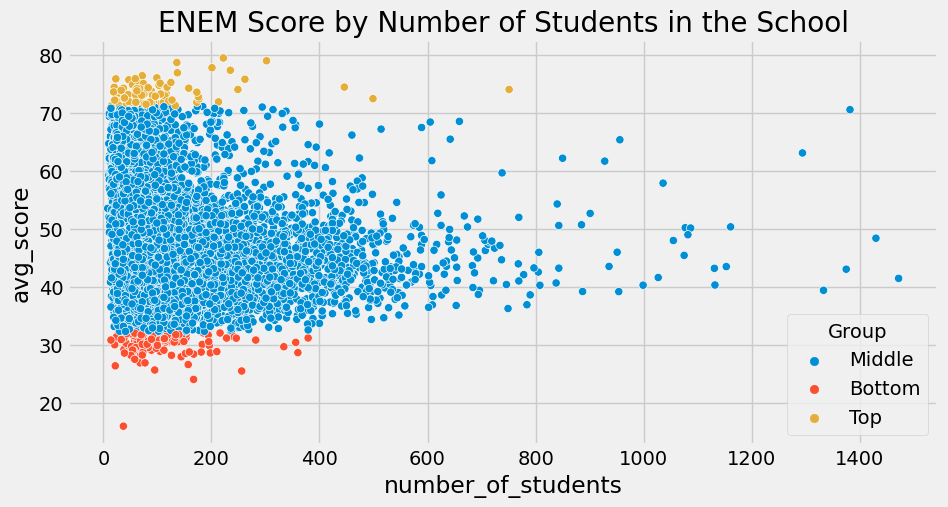

In [4]:
q_99 = np.quantile(df["avg_score"], .99)
q_01 = np.quantile(df["avg_score"], .01)

plot_data = (df
             .sample(10000)
             .assign(Group = lambda d: np.select([d["avg_score"] > q_99, d["avg_score"] < q_01],
                                                 ["Top", "Bottom"], "Middle")))
plt.figure(figsize=(10,5))
sns.scatterplot(y="avg_score", x="number_of_students", hue="Group", data=plot_data)
plt.title("ENEM Score by Number of Students in the School");

이 예시는 De Moivre’s 방정식이 말하는 바를 정확히 보여줍니다. 학생의 수가 많아지면 평균 점수는 더 정확해집니다. 샘플이 매우 적은 학교는 단지 우연 때문에 매우 높은 점수나 낮은 점수를 받을 수 있습니다. 큰 학교에서는 가능성이 적은 일입니다. De Moivre’s 방정식은 진짜 정보와 데이터 형태의 기록에 대한 근본적인 사실(항상 부정확합니다.)을 알려줍니다. 문제는 얼마나 부정확한 지입니다.

통계학은 부정확성을 다루는 과학이기 때문에 당황스럽진 않습니다. Taleb이 그의 책에서 말했듯이, 무작위성에 속습니다.

> 확률은 단지 주사위 확률과 같은 단순한 계산이 아닙니다. 지식에 대한 확신의 부족을 받아들이고 무지를 다루는 방법을 개발하는 것입니다.

불확실성을 정량화하는 한 가지 방법은 **추정치의 분산**입니다. 분산은 관측치가 중앙값 및 가장 가능성이 높은 값에서 얼마나 떨어질 수 있는지 나타냅니다. De Moivre’s 방정식에서 알 수 있듯이, 불확실성은 우리가 관찰하는 데이터의 양이 늘어남에 따라 감소합니다. 말이 되죠? 만약 많은 학생이 학교에서 우수한 성적을 낸다면, 정말 좋은 학교라 확신할 수 있습니다. 하지만 10명의 학생 중 8명이 좋은 성적을 내는 학교라면 더 의심할 필요가 있습니다. 학교에 우연히 평균 이상의 학생들이 있었을 수 있습니다.

위 그래프는 De Moivre’s 방정식을 정확히 말해줍니다. 표본 크기가 작으면 성적에 대한 추정치가 크게 차이 납니다. 표본 크기가 증가하면 분산이 작아집니다. 학교 평균 점수 외에도 우리가 추정하고자 하는 `ATE`를 포함한 모든 요약 통계가 De Moivre’s 방정식의 영향을 받습니다.

##  The Standard Error of Our Estimates

기초 통계학을 정리하는 것으로 빠르게 진행하겠습니다. 분포, 분산 및 표준 오차에 대해 잘 모르는 경우 계속 읽어보되 부족하다면 추가 자료를 찾아보세요. 통계학 입문에 관한 MIT 과정을 검색해 보는 것을 추천해 드립니다. 꽤 잘 설명되어 있어요.

2장에서 평균처치효과 $E[Y_1-Y_0]$는 처치된 것과 그렇지 않은 것 차이의 평균 $E[Y|T=1]-E[Y|T=0]$으로 추정했습니다. 쉬운 사례를 통해 온라인 수업에 대한 $ATE$를 알아냈습니다. 부정적인 결과를 확인했는데, 온라인 수업은 대면 수업보다 성적을 약 5점 떨어뜨렸습니다. 이제 5점이 통계적으로 얼마나 중요한지 확인할 수 있습니다.

먼저 $SE$를 추정해야 합니다. 이미 샘플 크기인 $n$은 알고 있습니다. 표준 편차는 아래 수식에 따라 얻습니다.

$$
\hat{\sigma}=\sqrt{\frac{1}{N-1}\sum_{i=1}^N (x_i-\bar{x})^2}
$$

$\bar{x}$는 $x$의 평균입니다. 다행히도 대부분의 프로그래밍 소프트웨어는 이미 이를 구현하고 있습니다. `pandas`의 [std](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)를 사용할 수 있습니다.

In [5]:
data = pd.read_csv("./data/online_classroom.csv")
online = data.query("format_ol==1")["falsexam"]
face_to_face = data.query("format_ol==0 & format_blended==0")["falsexam"]

def se(y: pd.Series):
    return y.std() / np.sqrt(len(y))

print("SE for Online:", se(online))
print("SE for Face to Face:", se(face_to_face))

SE for Online: 1.5371593973041635
SE for Face to Face: 0.8723511456319106


## Confidence Intervals

추정치의 표준 오차는 신뢰 척도입니다. 확실히 이해하기 위해서는 격동적이고 논쟁적인 통계 바다에 빠질 필요가 있습니다. 빈도주의 관점에서 데이터는 정확한 데이터 생성 프로세스의 표현일 뿐이라 말할 수 있습니다. 이 과정은 추상적이고 이상적입니다. 변하지 않고 알려지지 않은 진정한 매개변수에 의해 지배됩니다. 학생의 성적을 여러 번 수집할 수 있다면 데이터 세트들은 기본 데이터 생성 프로세스와 비슷하지만, 완전히 같지는 않을 것입니다. 이는 플라톤의 글과 매우 유사합니다.

> 본질적인 것들 각각은 **하나이지만**, 여러 행위나 물질과의 결합이나 조합에 의해 그 각각이 **여럿으로 보이네** (주:플라톤 국가 5권 p.475)

이해를 위해 학생들의 시험 점수에 대한 진정한 추상적인 분포를 가지고 있다고 가정해 보겠습니다. 분포는 평균이 74이고 표준 편차가 2인 정규 분포입니다. 이 정규 분포로 실험을 10000번 수행합니다. 각 실험은 500개의 샘플로 구성됩니다. 히스토그램으로 그래프를 표시하면 실험의 평균이 실제 평균을 중심으로 분포되어 있음을 알 수 있습니다. 일부 실험 데이터는 실제 데이터보다 평균이 낮고 일부는 더 높습니다.

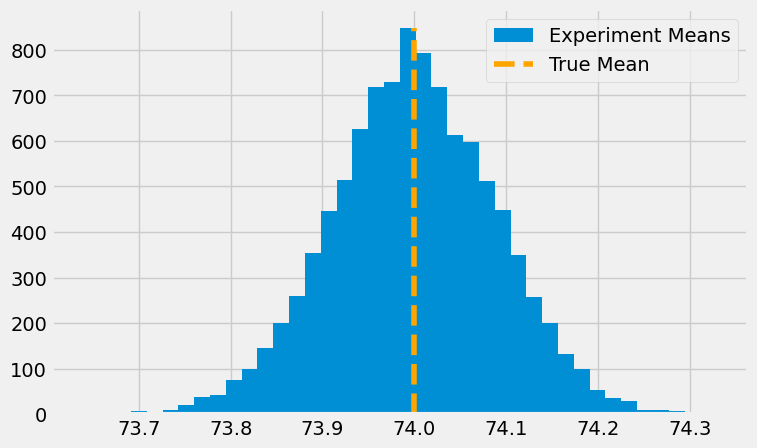

In [6]:
true_std = 2
true_mean = 74

n = 500
def run_experiment(): 
    return np.random.normal(true_mean,true_std, 500)

np.random.seed(42)

plt.figure(figsize=(8,5))
freq, bins, img = plt.hist([run_experiment().mean() for _ in range(10000)], bins=40, label="Experiment Means")
plt.vlines(true_mean, ymin=0, ymax=freq.max(), linestyles="dashed", label="True Mean", color="orange")
plt.legend();


우리가 평균들의 평균에 관해 이야기하고 있다는 것에 주목하세요. 평균은 우연히 실제 평균보다 약간 낮거나 높을 수 있습니다. 즉, 실험의 평균이 진정한 플라토닉 및 이상적인 평균과 일치한다고 확신할 수 없습니다. 그러나 **표준 오차로 95%의 실제 평균을 포함하는 구간은 만들 수 있습니다.**

실제로 여러 데이터 세트로 같은 실험을 할 여유는 없습니다. 우리는 보통 하나만 가지고 있어요. 하지만 **신뢰 구간**이라 부르는 것을 만들 수 있습니다. 신뢰 구간에는 확률이 붙습니다. 95%가 가장 일반적입니다. 확률은 실제 평균을 포함하는 서로 다른 연구의 가상 신뢰 구간을 알려줍니다. 예를 들어 유사한 연구에서 계산된 95% 신뢰 구간에는 95%의 실제 평균이 포함됩니다.

신뢰 구간을 계산하기 위해 **중심극한정리**를 사용합니다. 중심극한정리는 **실험의 평균이 정규 분포를 따른다는 것을 말해줍니다.** 통계 이론으로 95%는 정규분포의 `2` 표준 편차 사이에 해당함을 알 수 있습니다. 엄밀히 따지면 1.96이지만 2도 괜찮습니다.

![normal_density](./data/img/stats-review/normal_dist.jpeg)

평균의 표준 오차는 실험 평균의 분포에 대한 추정치 역할을 합니다. 실험의 평균에서 표준 오차에 2를 곱한 값을 빼거나 더하면 실제 평균에 대한 95% 신뢰 구간을 구성할 수 있습니다.

In [7]:
np.random.seed(321)
exp_data = run_experiment()
exp_se = exp_data.std() / np.sqrt(len(exp_data))
exp_mu = exp_data.mean()
ci = (exp_mu - 2 * exp_se, exp_mu + 2 * exp_se)
print(ci)

(73.82718114045632, 74.17341543460314)


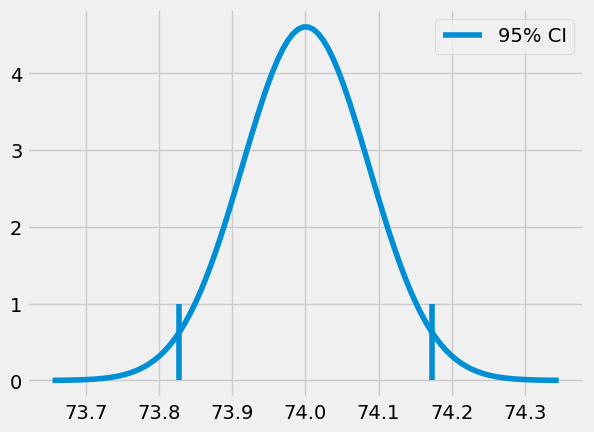

In [8]:
x = np.linspace(exp_mu - 4*exp_se, exp_mu + 4*exp_se, 100)
y = stats.norm.pdf(x, exp_mu, exp_se)
plt.plot(x, y)
plt.vlines(ci[1], ymin=0, ymax=1)
plt.vlines(ci[0], ymin=0, ymax=1, label="95% CI")
plt.legend()
plt.show()

물론 신뢰 구간을 95%로 제한할 필요는 없습니다. 99%에 해당하는 표준 편차를 찾아 99% 신뢰 구간을 만들 수도 있습니다.

`python`의 `ppf` 함수는 CDF의 역을 제공합니다. 95% CI를 찾았을 때처럼 표준 오차에 2를 곱하는 대신, `z`를 곱하면 99% CI가 됩니다. `ppf(0.5)`는 0.0을 반환하는데, 정규분포의 50%가 0.0보다 작기 때문입니다. 같은 이유로, 99.5%에 대응하는 `z`를 얻게 된다면 분포의 99.5%는 `z` 아래로 떨어집니다. 즉, 전체 중 0.5%가 `z`보다 큽니다.

In [9]:
from scipy import stats
z = stats.norm.ppf(.995)
print(z)
ci = (exp_mu - z * exp_se, exp_mu + z * exp_se)
ci

2.5758293035489004


(73.7773381773405, 74.22325839771896)

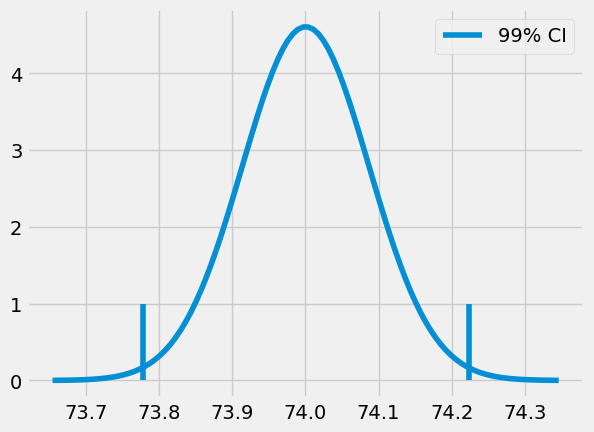

In [10]:
x = np.linspace(exp_mu - 4*exp_se, exp_mu + 4*exp_se, 100)
y = stats.norm.pdf(x, exp_mu, exp_se)
plt.plot(x, y)
plt.vlines(ci[1], ymin=0, ymax=1)
plt.vlines(ci[0], ymin=0, ymax=1, label="99% CI")
plt.legend()
plt.show()

교실 실험으로 돌아가면 온라인 및 대면 학생 그룹 모두에 대해 평균 시험 점수에 대한 신뢰 구간을 구성할 수 있습니다.

In [11]:
def ci(y: pd.Series):
    return (y.mean() - 2 * se(y), y.mean() + 2 * se(y))

print("95% CI for Online:", ci(online))
print("95% for Face to Face:", ci(face_to_face))

95% CI for Online: (70.56094429049804, 76.7095818797147)
95% for Face to Face: (76.80278229206951, 80.29218687459715)


양 그룹 간 95% CI는 겹치지 않습니다. 대면 수업 그룹의 CI 최솟값은 온라인 수업 그룹의 CI 최댓값보다 큽니다. 이는 결과가 우연이 아니며 대면 수업이 온라인 수업보다 낫다는 증거입니다. 즉 대면수업에서 온라인수업으로 전환할 때 학업성적에 상당한 인과적 감소가 발생합니다.

요약하자면 신뢰 구간은 추정치 주변에 불확실성을 두는 방법입니다. 표본 크기가 작을수록 표준 오차는 크고 신뢰 구간이 넓습니다. 신뢰 구간은 계산하기 쉬우므로 신뢰 구간이 없다면 일부 나쁜 의도를 나타내거나 지식이 부족하다는 신호입니다. (모두 우려되는 사항입니다.) 끝으로 불확실성 측정이 없는 값은 항상 의심해야 합니다.

<figure>
    <img src="data/img/stats-review/ci_xkcd.png">
    <figcaption>팁: 모형이 안좋다면 신뢰 구간내에서 표기하세요.</figcaption>
</figure>

마지막으로 한가지 주의점을 말씀드리겠습니다. 신뢰 구간은 보기보다 해석이 어렵습니다. 예를 들어 특정 95% 신뢰 구간에 95% 모집단 평균이 포함되어 있다고 말하면 안 됩니다. 신뢰 구간을 사용하는 빈도 통계에서는 모집단 평균이 실제 모집단 상수로 간주합니다. 모집단 평균은 신뢰 구간에 있거나 없을 수 있습니다. 즉 특정 신뢰 구간이 참 평균을 포함하거나 포함하지 않습니다. 만약 포함한다고 말한다면 확률은 95%가 아니라 100%가 될 것입니다. 그렇지 않으면 확률이 0%가 됩니다. 대신 신뢰 구간 95%는 신뢰 구간이 참 평균을 포함하는 빈도를 나타냅니다. 95%는 특정 구간 자체가 아니라 95% CI를 계산하는 데 사용되는 알고리즘에 대한 신뢰입니다.

경제학자(통계학자들은 눈을 돌려주세요.)로서 저는 이러한 순수주의가 유용하지 않다고 생각합니다. 실제로 신뢰 구간에 95%의 실제 평균이 포함되어 있다고 말하는 사람을 볼 수 있습니다. 틀리긴 하지만 여전히 추정치에 불확실성을 말하고 있어 그다지 해롭지 않습니다. 또한, 베이지안 통계로 전환하고 신뢰 구간 대신 가능 구간을 사용하면 해당 구간이 95%의 분포 평균을 포함한다고 할 수 있습니다. 제가 본 바로는 적절한 표본 크기를 가진 베이지안 확률 구간은 신뢰 구간과 유사하며, 빈도론자들 또한 인정합니다. 제 의견이 타당하다면 당신의 신뢰 구간에 대해 자유롭게 말하세요. 당신은 신뢰 구간이 95%의 진정한 평균을 포함한다고 말해도 상관없습니다. 다만 당신의 추정치 주변에 놓는 것을 잊지 마세요. 그렇지 않으면 당신은 바보처럼 보일 것입니다.

## Hypothesis Testing

불확실성을 통합하는 또 다른 방법은 가설 검정을 하는 것입니다. 평균의 차이가 통계적으로 0(또는 다른 값)과 다른가요? 두 독립 정규 분포의 합 또는 차도 정규 분포입니다. 결과의 평균은 두 분포 사이의 합 또는 차이며 전체 분산은 항상 각 분산의 합이 됩니다.

$
N(\mu_1, \sigma_1^2) - N(\mu_2, \sigma_2^2) = N(\mu_1 - \mu_2, \sigma_1^2 + \sigma_2^2)
$

$
N(\mu_1, \sigma_1^2) + N(\mu_2, \sigma_2^2) = N(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)
$

기억이 안 나도 괜찮아요. 항상 코드와 시뮬레이션 데이터를 사용하여 확인할 수 있습니다.

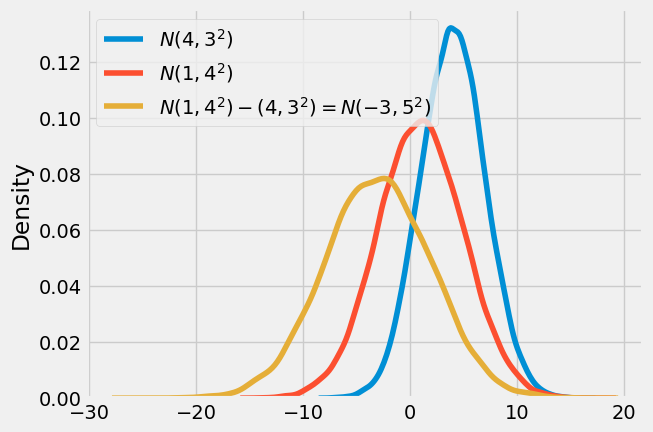

In [12]:
np.random.seed(123)
n1 = np.random.normal(4, 3, 30000)
n2 = np.random.normal(1, 4, 30000)
n_diff = n2 - n1
sns.distplot(n1, hist=False, label="$N(4,3^2)$")
sns.distplot(n2, hist=False, label="$N(1,4^2)$")
sns.distplot(n_diff, hist=False, label=f"$N(1,4^2) - (4,3^2) = N(-3, 5^2)$")
plt.legend()
plt.show()

두 그룹의 평균 분포를 취하고 다른 그룹에서 하나를 빼면 세 번째 분포를 갖게 됩니다. 이 최종 분포의 평균은 평균의 차이가 되고, 이 분포의 표준 편차는 표준 편차의 합의 제곱근이 됩니다.

$
\mu_{diff} = \mu_1 - \mu_2
$

$
SE_{diff} = \sqrt{SE_1 + SE_2} = \sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}
$

교실 예시로 돌아가겠습니다. 우리는 두 그룹 간 차이의 분포를 구성합니다. 물론 95% CI를 구하는 것은 간단합니다.

In [13]:
diff_mu = online.mean() - face_to_face.mean()
diff_se = np.sqrt(face_to_face.var()/len(face_to_face) + online.var()/len(online))
ci = (diff_mu - 1.96*diff_se, diff_mu + 1.96*diff_se)
print(ci)

(-8.376410208363385, -1.4480327880905248)


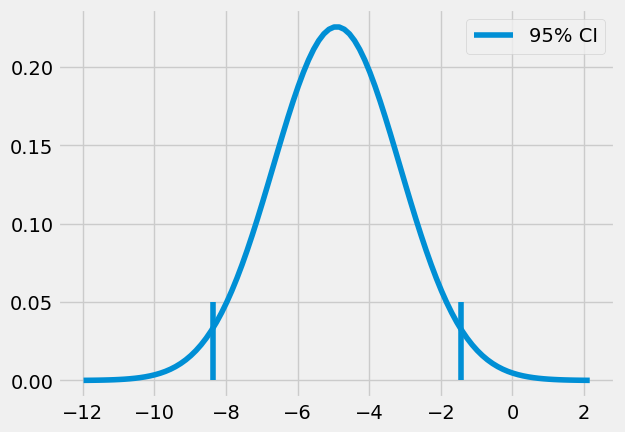

In [14]:
x = np.linspace(diff_mu - 4*diff_se, diff_mu + 4*diff_se, 100)
y = stats.norm.pdf(x, diff_mu, diff_se)
plt.plot(x, y)
plt.vlines(ci[1], ymin=0, ymax=.05)
plt.vlines(ci[0], ymin=0, ymax=.05, label="95% CI")
plt.legend()
plt.show()

온라인 그룹과 대면 그룹 간의 실제 차이가 -8.37과 -1.44 사이에 있다고 95% 신뢰할 수 있습니다. **z**값을 얻기 위해 차이의 평균을 차이의 $SE$로 나눌 수 있습니다.

$
z = \dfrac{\mu_{diff} - H_{0}}{SE_{diff}} = \dfrac{(\mu_1 - \mu_2) - H_{0}}{\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}}
$

$H_0$는 테스트하고자 하는 차이 값입니다.

`z` 통계량은 관측된 차이가 얼마나 극단적인지를 나타내는 척도입니다. 평균의 차이가 0과 통계적으로 다르다는 가설을 검정하기 위해 모순되는 가정을 사용할 것입니다. 먼저 차이가 0이라고 가정합니다. 이를 `null hypothesis`(귀무가설) 혹은 $H_0$라 합니다. "만약 정말로 차이가 0이라면 이러한 차이를 관찰할 가능성이 있는가?"라고 물어봅니다. 귀무가설로 문제를 `z` 통계량이 0에서 얼마나 멀리 떨어져 있는지 확인하는 것으로 변환할 수 있습니다.

$H_0$의 `z` 통계량은 표준 정규 분포를 따릅니다. 따라서 차이가 실제로 0이면 평균 95%인 2 표준 편차 내에서 `z` 통계량을 볼 수 있습니다. 결과는 `z`가 2 표준 편차를 넘어가는 것으로, 95% 신뢰도로 귀무가설을 기각할 수 있습니다.

교실 예제에서 어떻게 보이는지 확인해보겠습니다.

In [15]:
z = diff_mu / diff_se
print(z)

-2.7792810791031224


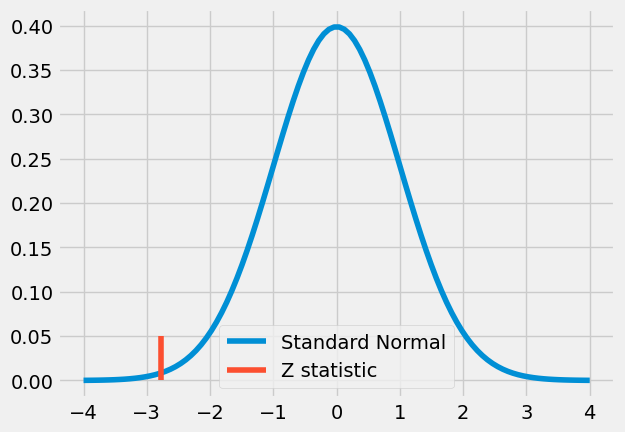

In [16]:
x = np.linspace(-4,4,100)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, label="Standard Normal")
plt.vlines(z, ymin=0, ymax=.05, label="Z statistic", color="C1")
plt.legend()
plt.show()

`z`는 꽤 극단적인 값처럼 보입니다. 실제로 2보다 큰 경우, 극단 값을 볼 확률이 5% 미만임을 의미합니다. 이 결과는 대면 수업에서 온라인 수업으로 전환하는 것이 통계적으로 상당한 학업 성취도의 감소를 일으킨다는 결론을 내리게 합니다.

가설 검정의 흥미로운 점은 처치된 그룹과 그렇지 않은 그룹의 95% CI가 겹치는지 확인하는 것보다 덜 보수적이라는 것입니다. 즉, 두 그룹의 신뢰 구간이 겹칠 때에도 통계적으로 유의할 수 있습니다. 예를 들어 대면 그룹의 평균 점수는 80점, 표준 오차가 4이고, 온라인 그룹의 평균 점수는 71점, 표준 오차가 2라고 해 보겠습니다.

In [17]:
cont_mu, cont_se = (71, 2)
test_mu, test_se = (80, 4)

diff_mu = test_mu - cont_mu
diff_se = np.sqrt(cont_se**2 + test_se**2)

print("Control 95% CI:", (cont_mu-1.96*cont_se, cont_mu+1.96*cont_se))
print("Test 95% CI:", (test_mu-1.96*test_se, test_mu+1.96*test_se))
print("Diff 95% CI:", (diff_mu-1.96*diff_se, diff_mu+1.96*diff_se))

Control 95% CI: (67.08, 74.92)
Test 95% CI: (72.16, 87.84)
Diff 95% CI: (0.23461352820082482, 17.765386471799175)


각 그룹에 대한 신뢰 구간을 구성하면 서로 겹칩니다. 온라인 그룹의 95% CI 상한은 74.92이고 대면 그룹의 하한은 72.16입니다. 그러나 그룹 간 차이에 대한 95% 신뢰 구간을 계산하면 0이 포함되어 있지 않습니다. 개별 신뢰 구간이 겹치더라도 그 차이는 여전히 통계적으로 0과 다를 수 있습니다.

## P-values

앞에서 온라인 그룹과 대면 그룹의 차이가 실제로 0이라면 이러한 극단적인 값을 관찰할 확률은 5% 미만이라고 말했습니다. 극단적인 값을 관찰할 가능성이 얼마인지 정확하게 추정할 수 있을까요? `p-value`을 확인합니다!

신뢰 구간(실제로 가장 빈번한 통계값입니다.)과 마찬가지로 `p-value`의 진정한 정의는 혼란스러울 수 있습니다. 위키피디아에서 정의를 가져오겠습니다. "`p-value`는 귀무가설이 맞다고 가정할 때 얻은 결과보다 극단적인 결과가 실제로 관측될 확률이다."

간단하게 말하자면 귀무가설이 참 일 때, 극단적인 값을 데이터를 볼 확률이 `p-value`입니다. 귀무가설이 참이면 측정값을 볼 가능성이 얼마나 낮은지를 측정합니다. 자연스럽게 귀무가설이 참일 확률과 혼동되는 경우가 많습니다. 차이점에 주목하세요. `p-value`는 $P(H_0|data)$가 아니라 $P(data|H_0)$입니다.

하지만 복잡함에 속지 마세요. 실용적인 측면에서 `p-value`는 간단히 사용할 수 있습니다.

![p_value](./data/img/stats-review/p_value.png)

`p-value`를 얻으려면 `z` 통계량 앞이나 뒤의 표준 정규 분포 면적을 계산해야 합니다. 다행히도 우리는 계산을 해줄 컴퓨터가 있습니다. 표준 정규 분포의 CDF에 z 통계량을 넣어 확인할 수 있습니다.

In [18]:
print("P-value:", stats.norm.cdf(z))

P-value: 0.0027239680835563383


95% 또는 99%와 같은 신뢰 수준을 지정할 필요가 없다는 점에서 `p-value`는 흥미롭습니다. `p-value`를 계산했다면 검정이 통과하거나 실패할 신뢰도를 정확하게 알고 있습니다. 예를 들어 p-값이 0.0027이면 0.2% 수준까지 유의하다는 것을 알 수 있습니다. 따라서 차이의 95% CI와 99% CI에는 0이 포함되지 않지만 99.9% CI에는 0이 포함됩니다. 차이가 0인 경우, 극한의 `z` 통계량을 관측할 확률은 0.2%에 불과합니다.

In [19]:
diff_mu = online.mean() - face_to_face.mean()
diff_se = np.sqrt(face_to_face.var()/len(face_to_face) + online.var()/len(online))
print("95% CI:", (diff_mu - stats.norm.ppf(.975)*diff_se, diff_mu + stats.norm.ppf(.975)*diff_se))
print("99% CI:", (diff_mu - stats.norm.ppf(.995)*diff_se, diff_mu + stats.norm.ppf(.995)*diff_se))
print("99.9% CI:", (diff_mu - stats.norm.ppf(.9995)*diff_se, diff_mu + stats.norm.ppf(.9995)*diff_se))

95% CI: (-8.376346553082909, -1.4480964433710017)
99% CI: (-9.46485353526404, -0.3595894611898709)
99.9% CI: (-10.728040658245558, 0.9035976617916459)


## Key Ideas

De Moivre’s 방정식을 아는 것이 얼마나 중요한지를 살펴보았으며, 방적식을 추정치에 불확실성을 부여하기 위해 사용했습니다. 또한, 온라인 수업이 대면 수업보다 학업 성취도가 떨어지는 것을 확인하였으며, 이 결과가 통계적으로 유의하다는 사실을 확인했습니다. 두 그룹에 대한 평균의 신뢰 구간을 비교하고, 차이에 대한 신뢰 구간을 살펴보고, 가설 검정을 수행하고, `p-value`를 살펴봤습니다. A/B 테스트를 수행하는 함수로 이 장을 마무리하겠습니다.

In [20]:
def AB_test(test: pd.Series, control: pd.Series, confidence=0.95, h0=0):
    mu1, mu2 = test.mean(), control.mean()
    se1, se2 = test.std() / np.sqrt(len(test)), control.std() / np.sqrt(len(control))
    
    diff = mu1 - mu2
    se_diff = np.sqrt(test.var()/len(test) + control.var()/len(control))
    
    z_stats = (diff-h0)/se_diff
    p_value = stats.norm.cdf(z_stats)
    
    def critial(se): return -se*stats.norm.ppf((1 - confidence)/2)
    
    print(f"Test {confidence*100}% CI: {mu1} +- {critial(se1)}")
    print(f"Control {confidence*100}% CI: {mu2} +- {critial(se2)}")
    print(f"Test-Control {confidence*100}% CI: {diff} +- {critial(se_diff)}")
    print(f"Z Statistic {z_stats}")
    print(f"P-Value {p_value}")
        
AB_test(online, face_to_face)

Test 95.0% CI: 73.63526308510637 +- 3.0127770572134565
Control 95.0% CI: 78.54748458333333 +- 1.7097768273108005
Test-Control 95.0% CI: -4.912221498226955 +- 3.4641250548559537
Z Statistic -2.7792810791031224
P-Value 0.0027239680835563383


함수가 충분히 일반적이므로 다른 귀무가설도 검정할 수 있습니다. 예를 들어 온라인 수업과 대면 수업의 차이가 `-1`이라는 것을 기각할 수 있나요? 결과를 통해 95%의 확신을 가지고 그 차이가 `-1`보다 더 중요하다고 말할 수 있습니다. 하지만 99%의 확신을 가지고 말할 수는 없습니다.

In [21]:
AB_test(online, face_to_face, h0=-1)

Test 95.0% CI: 73.63526308510637 +- 3.0127770572134565
Control 95.0% CI: 78.54748458333333 +- 1.7097768273108005
Test-Control 95.0% CI: -4.912221498226955 +- 3.4641250548559537
Z Statistic -2.2134920404560883
P-Value 0.013431870694630114


## References

I like to think of this entire book as a tribute to Joshua Angrist, Alberto Abadie and Christopher Walters for their amazing Econometrics class. Most of the ideas here are taken from their classes at the American Economic Association. Watching them is what is keeping me sane during this tough year of 2020.
* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

I'll also like to reference the amazing books from Angrist. They have shown me that Econometrics, or 'Metrics as they call it, is not only extremely useful but also profoundly fun.

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering 'Metrics](https://www.masteringmetrics.com/)

My final reference is Miguel Hernan and Jamie Robins' book. It has been my trustworthy companion in the most thorny causal questions I had to answer.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

The data used here is from a study of Alpert, William T., Kenneth A. Couch, and Oskar R. Harmon. 2016. ["A Randomized Assessment of Online Learning"](https://www.aeaweb.org/articles?id=10.1257/aer.p20161057). American Economic Review, 106 (5): 378-82.

![img](./data/img/poetry.png)

## Contribute

Causal Inference for the Brave and True is an open-source material on causal inference, the statistics of science. Its goal is to be accessible monetarily and intellectually. It uses only free software based on Python.
If you found this book valuable and want to support it, please go to [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). If you are not ready to contribute financially, you can also help by fixing typos, suggesting edits, or giving feedback on passages you didn't understand. Go to the book's repository and [open an issue](https://github.com/matheusfacure/python-causality-handbook/issues). Finally, if you liked this content, please share it with others who might find it helpful and give it a [star on GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).